# Model

In [22]:
using ReachabilityAnalysis

In [23]:
@taylorize function laubloomis!(dx, x, params, t)
    dx[1] = 1.4*x[3] - 0.9*x[1]
    dx[2] = 2.5*x[5] - 1.5*x[2]
    dx[3] = 0.6*x[7] - 0.8*(x[2]*x[3])
    dx[4] = 2 - 1.3*(x[3]*x[4])
    dx[5] = 0.7*x[1] - (x[4]*x[5])
    dx[6] = 0.3*x[1] - 3.1*x[6]
    dx[7] = 1.8*x[6] - 1.6*(x[2]*x[7])
    return dx
end

In [48]:
W = [0.01, 0.05, 0.1]; # box range of the initial set

# initial-value problem
X0c = [1.2, 1.05, 1.5, 2.4, 1.0, 0.1, 0.45];

In [62]:
GC.gc()

In [63]:
X0 = Hyperrectangle(X0c, fill(W[1], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@time sol1 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-11,orderT=7,orderQ=1));

  1.757274 seconds (26.29 M allocations: 1.438 GiB, 16.87% gc time)


In [64]:
X0 = Hyperrectangle(X0c, fill(W[2], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@time sol2 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-12,orderT=7,orderQ=1));

  2.195167 seconds (32.18 M allocations: 1.766 GiB, 18.02% gc time)


In [65]:
X0 = Hyperrectangle(X0c, fill(W[3], 7))
prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
@time sol3 = solve(prob, tspan=(0.0, 20.0), TMJets(abs_tol=1e-12,orderT=7,orderQ=1));

  2.307205 seconds (35.99 M allocations: 1.906 GiB, 20.98% gc time)


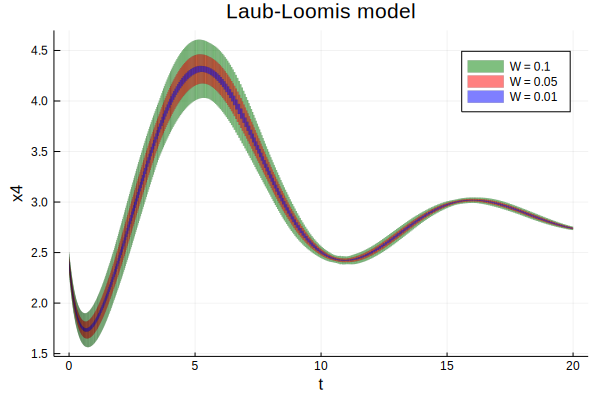

In [66]:
plot(overapproximate(sol3, Zonotope), vars=(0, 4), color=:green, lw=0.1, lab="W = $(W[3])", title="Laub-Loomis model", xlab="t", ylab="x4")
plot!(overapproximate(sol2, Zonotope), vars=(0, 4), color=:red,   lw=0.1, lab="W = $(W[2])")
plot!(overapproximate(sol1, Zonotope), vars=(0, 4), color=:blue,  lw=0.1, lab="W = $(W[1])")

## Plot

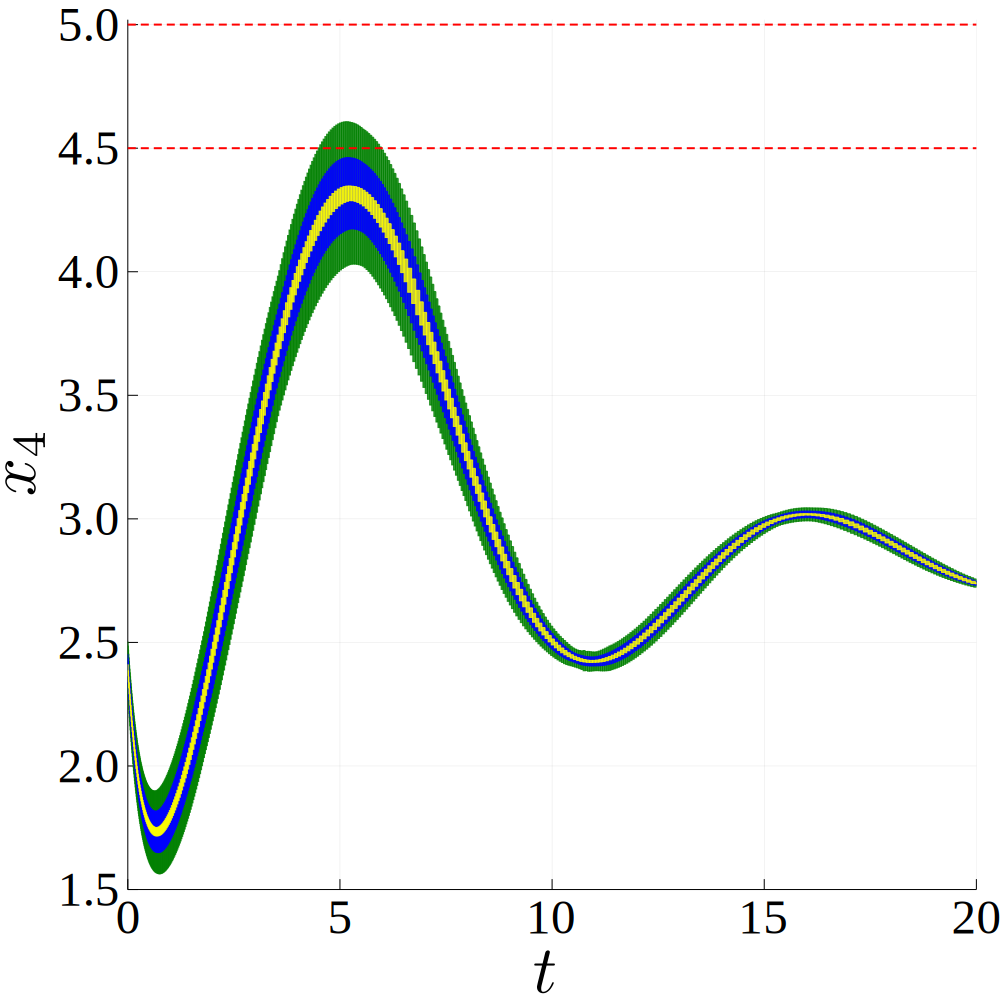

In [67]:
using LaTeXStrings, Plots, Plots.PlotMeasures, LaTeXStrings

fig = Plots.plot()

#Plots.plot!(fig,overapproximate(sol3, Zonotope), vars=(0, 4), color=:green, lw=0.1, lab="W = $(W[3])", title="Laub-Loomis model", xlab="t", ylab="x4")
#Plots.plot!(fig,overapproximate(sol2, Zonotope), vars=(0, 4), color=:red,   lw=0.1, lab="W = $(W[2])")
#Plots.plot!(fig, overapproximate(sol1, Zonotope), vars=(0, 4), color=:blue,  lw=0.1, lab="W = $(W[1])")

Plots.plot!(fig, overapproximate(sol3, Zonotope),  vars=(0, 4), linecolor="green", color=:green, alpha=0.8)
Plots.plot!(fig, overapproximate(sol2, Zonotope), vars=(0, 4), linecolor="blue", color=:blue, alpha=0.8)
Plots.plot!(fig, overapproximate(sol1, Zonotope), vars=(0, 4), linecolor="yellow", color=:yellow, alpha=0.8,
    tickfont=font(30, "Times"), guidefontsize=45,
    xlab=L"t\raisebox{-0.5mm}{\textcolor{white}{.}}",
    ylab=L"x_4\raisebox{2mm}{\textcolor{white}{.}}",
    xtick=[0., 5., 10., 15., 20.], ytick=[1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5.],
    xlims=(0., 20.), ylims=(1.5, 5.02),
    bottom_margin=6mm, left_margin=2mm, right_margin=4mm, top_margin=3mm,
    size=(1000, 1000))

Plots.plot!(fig, x->x, x->4.5, 0., 20., line=2, color="red", linestyle=:dash, legend=nothing)
Plots.plot!(fig, x->x, x->5., 0., 20., line=2, color="red", linestyle=:dash, legend=nothing)

In [68]:
savefig(fig, "ARCH-COMP20-JuliaReach-LaubLoomis_3.pdf")

# Runtime

In [42]:
using BenchmarkTools

In [ ]:
@time begin
    X0 = Hyperrectangle(X0c, fill(W[1], 7))
    prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
    sol = solve(prob, tspan=(0.0, 5.0), TMJets(max_steps=1000, abs_tol=1e-12, orderT=5, orderQ=1));
    solZ = overapproximate(sol, Zonotope);
    v4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] # the flowpipe has been projected so we check for the second component which is x4
    @assert all([((-ρ(-v4, solZ.F.Xk[i].X)..ρ(v4, solZ.F.Xk[i].X)) < 4.5) for i in eachindex(solZ.F.Xk)])
end

In [ ]:
@time begin
    X0 = Hyperrectangle(X0c, fill(W[2], 7))
    prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
    sol = solve(prob, tspan=(0.0, 5.0), TMJets(max_steps=1000, abs_tol=1e-7, orderT=5, orderQ=1));
    solZ = overapproximate(sol, Zonotope);
    v4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] # the flowpipe has been projected so we check for the second component which is x4
    @assert all([((-ρ(-v4, solZ.F.Xk[i].X)..ρ(v4, solZ.F.Xk[i].X)) < 4.5) for i in eachindex(solZ.F.Xk)])
end

In [ ]:
@time begin
    X0 = Hyperrectangle(X0c, fill(W[3], 7))
    prob = @ivp(x' = laubloomis!(x), dim: 7, x(0) ∈ X0);
    sol = solve(prob, tspan=(0.0, 5.0), TMJets(max_steps=1000, abs_tol=1e-7, orderT=5, orderQ=1));
    solZ = overapproximate(sol, Zonotope);
    v4 = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] # the flowpipe has been projected so we check for the second component which is x4
    @assert all([((-ρ(-v4, solZ.F.Xk[i].X)..ρ(v4, solZ.F.Xk[i].X)) < 4.5) for i in eachindex(solZ.F.Xk)])
end